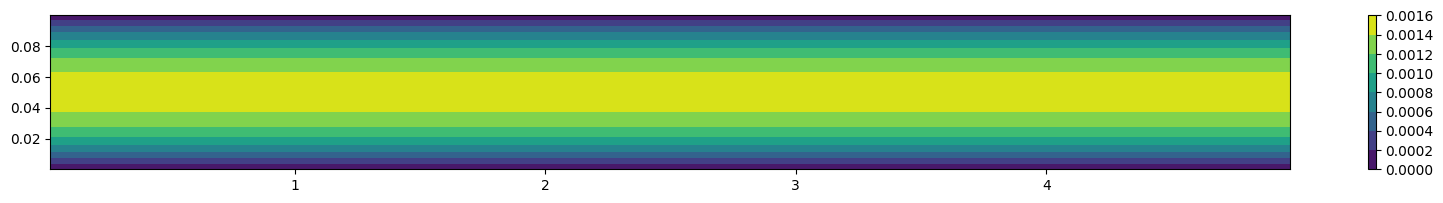

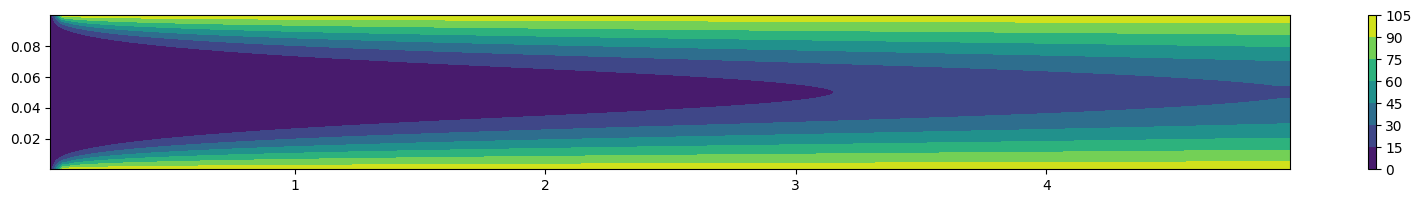

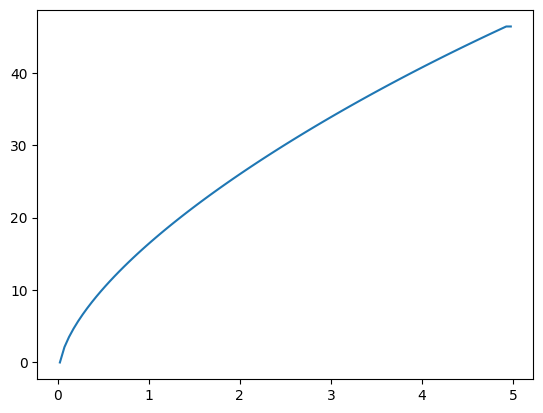

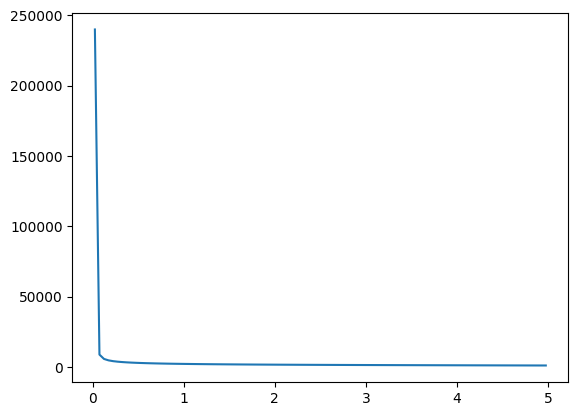

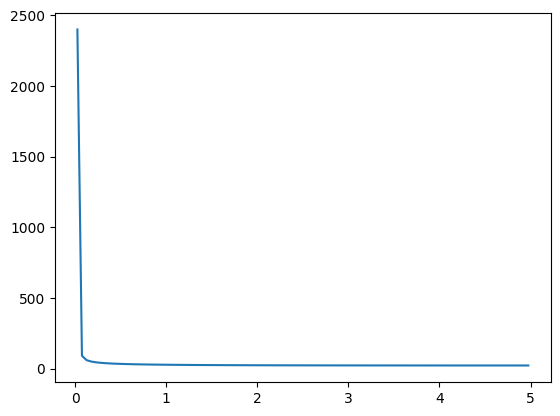

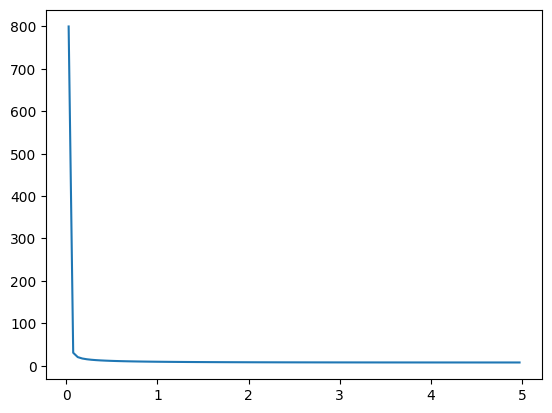

7.596127955342932


In [2]:
import numpy as np
import matplotlib.pyplot as plt

T0 = 0
Tw = 100

u0 = 0.001

H = 0.1
L = 5

N = 100
M = 200

dx = L/N
dy = H/M

ro = 1000
cp = 4200
lamda = 0.6
a = lamda/cp/ro

U = np.zeros((M,N))
for i in range(N):
    for j in range(M):
        y = 0.5*H-(dy/2+j*dy)
        U[j,i] = 1.5*u0*(1-(4*y**2/H**2))

A = np.zeros((M*N, M*N))
B = np.zeros(M*N)

for i in range(N):
    A[i, i] = 1
    B[i] = Tw
    A[N*(M-1)+i, N*(M-1)+i] = 1
    B[N*(M-1)+i] = Tw

for i in range(M):
    A[i*N, i*N] = 1
    B[i*N] = T0
    A[i*N+N-1, i*N+N-1] = -1
    A[i*N+N-1, i*N+N-2] = 1
    B[i*N+N-1] = 0

for i in range(1, M-1):
    for j in range(1, N-1):
        A[i*N+j, i*N+j  ] = -U[i, j]/dx - 2*a/dx**2 - 2*a/dy**2
        A[i*N+j, i*N+j+1] = a/dx**2
        A[i*N+j, i*N+j-1] = a/dx**2 + U[i, j]/dx
        A[i*N+j, i*N+j+N] = a/dy**2
        A[i*N+j, i*N+j-N] = a/dy**2

t = np.linalg.solve(A, B)
T = np.zeros((M, N))

for i in range(M):
    for j in range(N):
        T[i, j] = t[i*N+j]

X = [dx/2+dx*i for i in range(N)]
Y = [dy/2+dy*i for i in range(M)]

plt.figure(figsize=(20, 2))
plt.contourf(X,Y,U)
plt.colorbar()
plt.show()

plt.figure(figsize=(20, 2))
plt.contourf(X,Y,T)
plt.colorbar()
plt.show()

Tav = np.zeros(N)
q = np.zeros(N)
alpha = np.zeros(N)
Nu = np.zeros(N)

for i in range(N):
    Tsumm = 0
    for j in range(M):
        Tsumm =Tsumm + ro*U[j, i]*T[j, i]*dy
    Tav[i] = Tsumm/(ro*u0*H)
    q[i] = lamda*(Tw-T[1, i])/dy
    alpha[i] = q[i]/(Tw-Tav[i])
    Nu[i] = alpha[i]*2*H/lamda

plt.plot(X, Tav)
plt.show()
plt.plot(X, q)
plt.show()
plt.plot(X, alpha)
plt.show()
plt.plot(X, Nu)
plt.show()
print(Nu[-1])